# Visualization of accident patterns in Kiel

In [2]:
import altair as alt
import geopandas as gpd

In [3]:
# importing the data
accidentsKiel = gpd.read_file("data/accidents.geojson")
districtsKiel = gpd.read_file("data/districts.geojson")

In [20]:
accidentsKiel

year     month  hour    weekday         harm_type  \
0     2016   January     7  Wednesday  Slightly Injured   
1     2016   January    11    Tuesday  Slightly Injured   
2     2016   January     6     Friday  Slightly Injured   
3     2016   January     7    Tuesday  Slightly Injured   
4     2016   January     4     Sunday  Slightly Injured   
...    ...       ...   ...        ...               ...   
6767  2022  December     7     Monday  Slightly Injured   
6768  2022  December    17    Tuesday  Slightly Injured   
6769  2022  December    18     Monday  Slightly Injured   
6770  2022  December    15   Thursday  Severely Injured   
6771  2022  December     7     Monday  Slightly Injured   

                                                  type1  \
0              Collision between vehicle and pedestrian   
1     Collision with another vehicle moving laterall...   
2     Collision with another vehicle which starts, s...   
3     Collision with another vehicle which turns int...   
4                              Accident of another kind   
...                                                 ...   
6767                           Accident of another kind   
6768  Collision with another vehicle which starts, s...   
6769  Collision with another vehicle which turns int...   
6770  Collision with another vehicle which turns int...   
6771  Collision with another vehicle which turns int...   

                                                  type2 light_conditions bike  \
0                  Accident caused by crossing the road         Twilight    0   
1     Accident between vehicles moving along in carr...             None    0   
2                         Accident involving stationary         Twilight    0   
3     Accident caused by turning into a road or by c...         Twilight    0   
4                                      Driving accident         Twilight    0   
...                                                 ...              ...  ...   
6767                                     Other accident         Twilight    1   
6768                                     Other accident         Twilight    1   
6769  Accident caused by turning into a road or by c...         Twilight    1   
6770  Accident caused by turning into a road or by c...             None    0   
6771  Accident caused by turning into a road or by c...         Twilight    0   

     car pedestrian motorcycle truck other                        geometry  
0      1          1          0     0     0  POINT (573159.144 6018353.323)  
1      1          0          0     1     0  POINT (572991.842 6017953.685)  
2      0          0          0     0     1  POINT (574104.830 6018642.713)  
3      1          0          1     0     0  POINT (573294.512 6019242.699)  
4      0          0          1     0     0  POINT (575998.620 6019246.232)  
...   ..        ...        ...   ...   ...                             ...  
6767   0          0          0     0     0  POINT (573628.117 6019416.776)  
6768   1          0          0     0     0  POINT (574259.367 6020007.083)  
6769   0          0          0     0     0  POINT (573557.532 6025810.505)  
6770   1          0          0     0     1  POINT (574694.462 6014594.544)  
6771   1          0          1     0     0  POINT (574222.794 6022108.091)  

[6772 rows x 15 columns]

In [54]:
# create a column with the year and month combined
accidentsKiel["year_month"] = accidentsKiel["year"].astype(str) + "-" + accidentsKiel["month"].astype(str)

<Axes: >

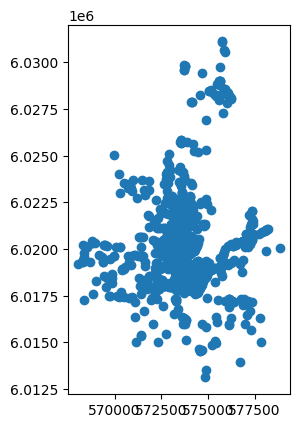

In [32]:
# print the geometry colum on a folium map
# only print accidents from year == 2022
accidentsKiel[accidentsKiel["year"] == 2022].plot()

<Axes: >

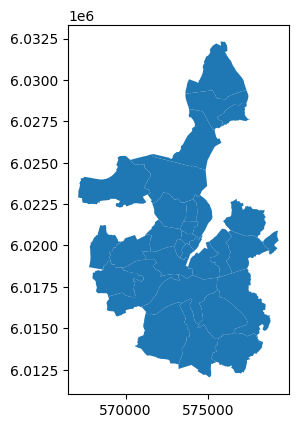

In [35]:
districtsKiel.plot()

In [37]:
accidentsKiel.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6772 entries, 0 to 6771
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   year              6772 non-null   int64   
 1   month             6772 non-null   object  
 2   hour              6772 non-null   int64   
 3   weekday           6772 non-null   object  
 4   harm_type         6772 non-null   object  
 5   type1             6772 non-null   object  
 6   type2             6772 non-null   object  
 7   light_conditions  1389 non-null   object  
 8   bike              6772 non-null   object  
 9   car               6772 non-null   object  
 10  pedestrian        6772 non-null   object  
 11  motorcycle        6772 non-null   object  
 12  truck             5729 non-null   object  
 13  other             6772 non-null   object  
 14  geometry          6772 non-null   geometry
dtypes: geometry(1), int64(2), object(12)
memory usage: 793.7+ KB


In [51]:
# anzahl der verschiedenen ausprägungen jedes attributes in accidentsKiel
accidentsKiel.nunique()

year                   7
month                 12
hour                  24
weekday                7
harm_type              3
type1                 10
type2                  7
light_conditions       2
bike                   2
car                    2
pedestrian             2
motorcycle             2
truck                  2
other                  2
geometry            6657
dtype: int64

<Axes: ylabel='count'>

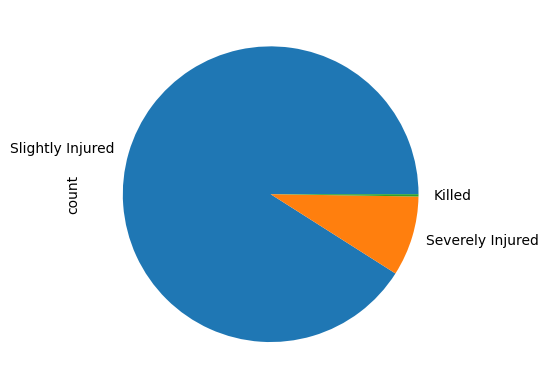

In [44]:
accidentsKiel["harm_type"].value_counts().plot.pie()

In [75]:
# color: car, pedestrian, bike, truck, motorcycle
# y-axis hour
# x harm_type

alt.data_transformers.disable_max_rows()

hexagon = "M0,-2.3094010768L2,-1.1547005384 2,1.1547005384 0,2.3094010768 -2,1.1547005384 -2,-1.1547005384Z"

# Size of the hexbins
size = 15
# Count of distinct x features
xFeaturesCount = 12
# Count of distinct y features
yFeaturesCount = 7
# Name of the x field
xField = 'date'
# Name of the y field
yField = 'date'

# plot this with Altair
alt.Chart(accidentsKiel).mark_point(size=2, shape=hexagon).encode(
    x="hour",
    y="month",
    color="harm_type",
).transform_calculate(
    # This field is required for the hexagonal X-Offset
    xFeaturePos='(day(datum.' + yField + ') % 2) / 2 + month(datum.' + xField + ')'
).properties(
    # Exact scaling factors to make the hexbins fit
    width=size * xFeaturesCount * 2,
    height=size * yFeaturesCount * 1.7320508076,  # 1.7320508076 is approx. sin(60°)*2
).configure_view(
    strokeWidth=0
)




alt.Chart(...)

In [89]:

# create chart
chart = alt.Chart(accidentsKiel).mark_circle().encode(
    x=alt.X('hour:O', title='Stunde'),
    y=alt.Y('month:O', title='Monat'),
    color=alt.Color('count():Q', title='Anzahl der Unfälle', scale=alt.Scale(scheme='redyellowblue')),
    size=alt.Size('harm_type:N', title='Schadensart')
).properties(
    title='Verkehrsunfälle in Kiel im Jahr 2019',
    width=600,
    height=400
).interactive()

# display chart
chart


alt.Chart(...)

In [52]:
# Create the chart
chart = alt.Chart(accidentsKiel[accidentsKiel["year"] == 2022]).mark_bar().encode(
    x='harm_type:N',
    y='hour',
    color='vehicle_type:N'  # Assuming the column name for vehicle type is 'vehicle_type'
)

chart

alt.Chart(...)